In [1]:
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime
import random

In [4]:
bellavista = pd.read_csv("climate_bellavista.csv")

# Uncomment the below to focus on Galapagos
rainfall = pd.read_csv("precipitation_galapagos.csv")
eruptions = pd.read_csv("eruptions_galapagos2.csv")
average_rain = pd.read_csv("average_galapagos.csv")

# Uncomment the below to focus on Piton de Fournaise
# rainfall = pd.read_csv("precipitation_reunion.csv")
# eruptions = pd.read_csv("eruptions_reunion.csv")
# average_rain = pd.read_csv("average_reunion.csv")

# Can modify this for other locations, but first make sure your tables are of the same format as the ones above.


/var/folders/d0/48hh0ndj2v59mjry93b9grn00000gn/T/ipykernel_46644/1462940085.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  rainfall = pd.read_csv("precipitation_galapagos.csv")


In [3]:
#Converts date to a numerical value

def date_to_decimal_year(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    year = date_obj.year
    day_of_year = date_obj.timetuple().tm_yday
    decimal_year = year + (day_of_year - 1) / 365.0
    decimal_year = round(decimal_year,4) 
    return decimal_year

In [7]:
# # Run before next cell if focused on a single volcano in the Galapagos. Make sure appropriate csv's are imported above.

#locations = {'Wolf': ('Wolf', 0.0, -91.20), 'Fernandina': ('Fernandina', -0.22, -91.33), 'Sierra Negra': ('Negra, Sierra', -0.83, -91.17), 'Cerro Azul': ('Azul, Cerro', -0.55, -91.24), 'Alcedo': ('Alcedo', -0.26, -91.07), 'Marchena': ('Marchena', 0.35, -90.5), 'Puerto Ayora': ('Puerto Ayora', -0.74, -90.30), 'Bellavista': ('Bellavista', -0.69, -90.33), 'Sierra Negra south coast': ('Negra, Sierra', -1.01, -91.12), 'Sierra Negra south of caldera': ('Negra, Sierra', -0.86, -91.12), 'Sierra Negra north coast': ('Negra, Sierra', -0.65, -91.12)}
locations = {'Wolf': ('Wolf', 0.0, -91.20), 'Fernandina': ('Fernandina', -0.22, -91.33), 'Sierra Negra': ('Negra, Sierra', -0.83, -91.17), 'Cerro Azul': ('Azul, Cerro', -0.55, -91.24), 'Alcedo': ('Alcedo', -0.26, -91.07), 'Marchena': ('Marchena', 0.35, -90.5)}

pick = 'Bellavista' # enter desired volcano name here
lat_range = .1 # enter desired latitude range
lon_range = .1 # enter desired longitude range

lat = locations[pick][1]
lon = locations[pick][2]
rainfall['Longitude'] = pd.to_numeric(rainfall['Longitude'], errors='coerce')
rainfall['Latitude'] = pd.to_numeric(rainfall['Latitude'], errors='coerce')

nearby_rain = rainfall[(abs(lon - rainfall['Longitude']) <= lon_range) & (abs(lat - rainfall['Latitude']) <= lat_range)]
dates = np.sort(nearby_rain['Date'].unique())
averages = [[date, nearby_rain['Precipitation'][nearby_rain['Date'] == date].mean()] for date in dates]
average_rain = pd.DataFrame(averages, columns = ['Date', 'Precipitation'])


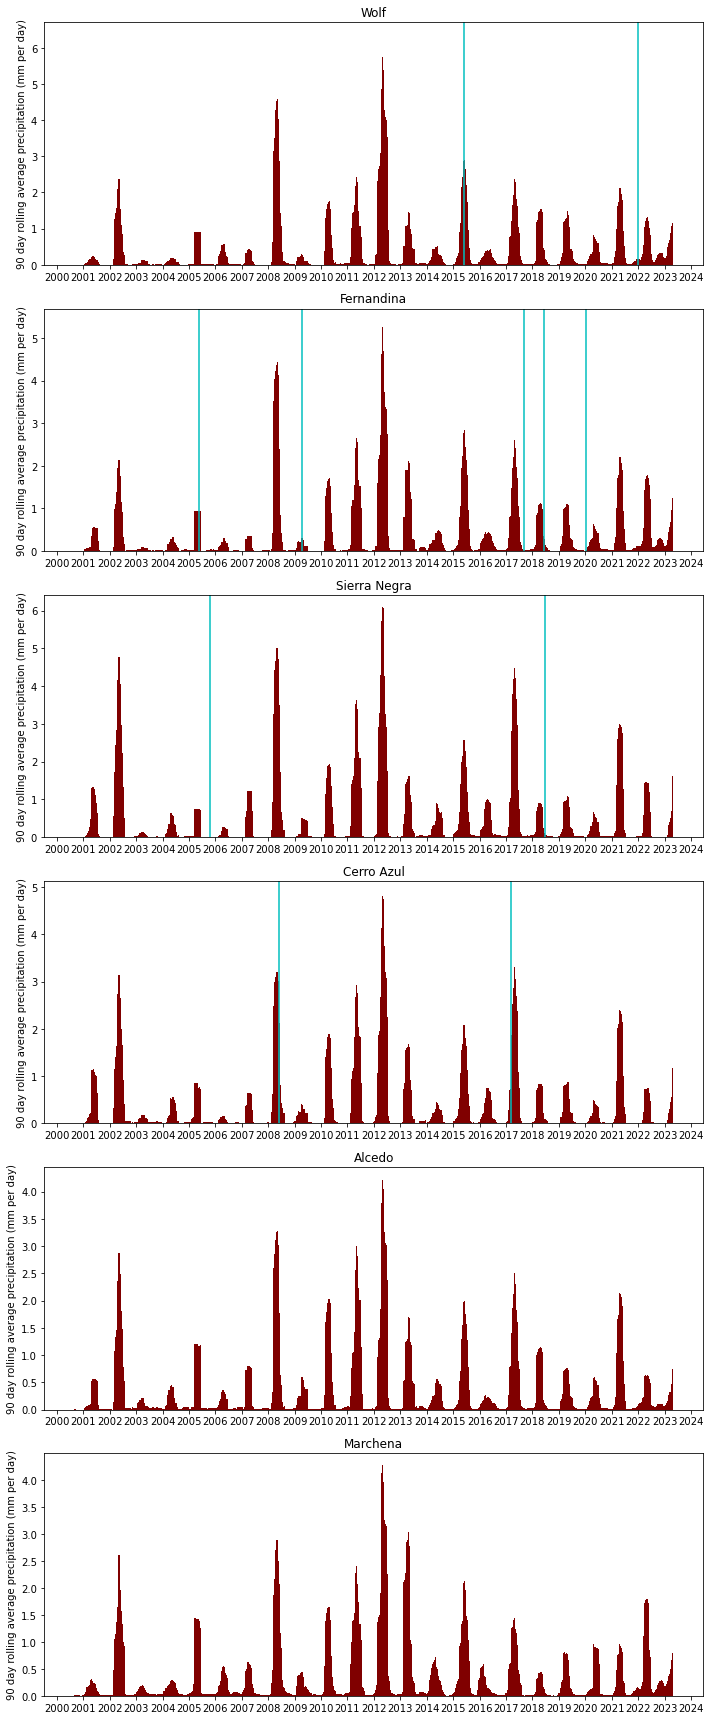

In [9]:
#Plot all volcanos
locations = {'Wolf': ('Wolf', 0.0, -91.20), 'Fernandina': ('Fernandina', -0.22, -91.33), 'Sierra Negra': ('Negra, Sierra', -0.83, -91.17), 'Cerro Azul': ('Azul, Cerro', -0.55, -91.24), 'Alcedo': ('Alcedo', -0.26, -91.07), 'Marchena': ('Marchena', 0.35, -90.5)}
lat_range = .1 # enter desired latitude range
lon_range = .1 # enter desired longitude range
rainfall['Longitude'] = pd.to_numeric(rainfall['Longitude'], errors='coerce')
rainfall['Latitude'] = pd.to_numeric(rainfall['Latitude'], errors='coerce')
fig, axes = plt.subplots(6, 1, figsize=(10, 24))
count = 0
for pick in locations:
    lat = locations[pick][1]
    lon = locations[pick][2]
    eruption_lines = eruptions['Start'][(eruptions['Start'] >= '2000-06-01') & (eruptions['Volcano'] == locations[pick][0])].apply(date_to_decimal_year)
    nearby_rain = rainfall[(abs(lon - rainfall['Longitude']) <= lon_range) & (abs(lat - rainfall['Latitude']) <= lat_range)]
    dates = np.sort(nearby_rain['Date'].unique())
    averages = [[date, nearby_rain['Precipitation'][nearby_rain['Date'] == date].mean()] for date in dates]
    average_rain = pd.DataFrame(averages, columns = ['Date', 'Precipitation'])
    # For 90 day average
    rolling = np.array(average_rain.Precipitation.rolling(90).mean())

    # Convert date strings to decimal years
    decimal_year = np.array(average_rain['Date'].apply(date_to_decimal_year))

    axes[count].bar(decimal_year, rolling, color ='maroon', width = 0.01)

    #axes[count].set_vlines(eruption_lines, 0, 12)

    for line_x in eruption_lines:
        axes[count].axvline(x=line_x, color='c')


    axes[count].set_ylabel("90 day rolling average precipitation (mm per day)")
 
    axes[count].set_title(str(pick))

    axes[count].set_xticks(ticks=[2000 + i for i in range(25)], rotation=90)

    count += 1

# Data plot
plt.tight_layout()
plt.savefig("combined_volcs.jpg")
plt.show()


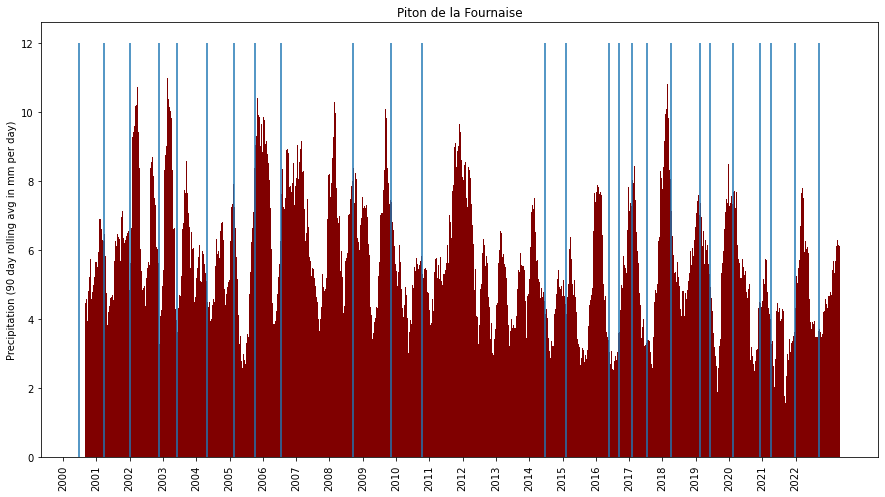

In [4]:
eruption_lines = eruptions['Start'][eruptions['Start'] >= '2000-06-01'].apply(date_to_decimal_year)

# For 90 day average
rolling = np.array(average_rain.Precipitation.rolling(90).mean())

# Convert date strings to decimal years
decimal_year = np.array(average_rain['Date'].apply(date_to_decimal_year))

plt.figure(figsize=(15,8))

plt.bar(decimal_year, rolling, color ='maroon',
       width = 0.01)

plt.vlines(eruption_lines, 0, 12)

plt.ylabel("Precipitation (90 day rolling avg in mm per day)")
 
plt.title('Piton de la Fournaise')

plt.xticks(ticks=[2000 + i for i in range(23)], rotation=90)

# Data plot
plt.show()

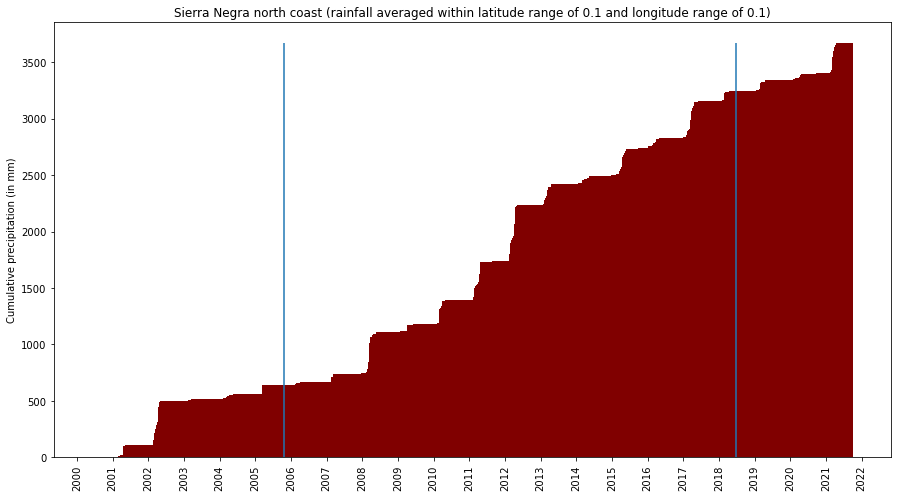

In [59]:
# This cell produces a cumulative rainfall bar chart

average_rain["cumulative"] = average_rain.Precipitation.cumsum()
Precipitation=np.array(average_rain['cumulative'])
vline_height = 3500



# Convert date strings to decimal years
average_rain['Decimal_Year'] = average_rain['Date'].apply(date_to_decimal_year)

plt.figure(figsize=(15,8))

plt.bar(average_rain.Decimal_Year, Precipitation, color ='maroon',
       width = 0.01)

plt.vlines(eruption_lines, 0, np.max(Precipitation))

plt.ylabel("Cumulative precipitation (in mm)")
 
plt.title(f'{pick} (rainfall averaged within latitude range of {lat_range} and longitude range of {lon_range})')

plt.xticks(ticks=[2000 + i for i in range(23)], rotation=90)

# Data plot
plt.show()

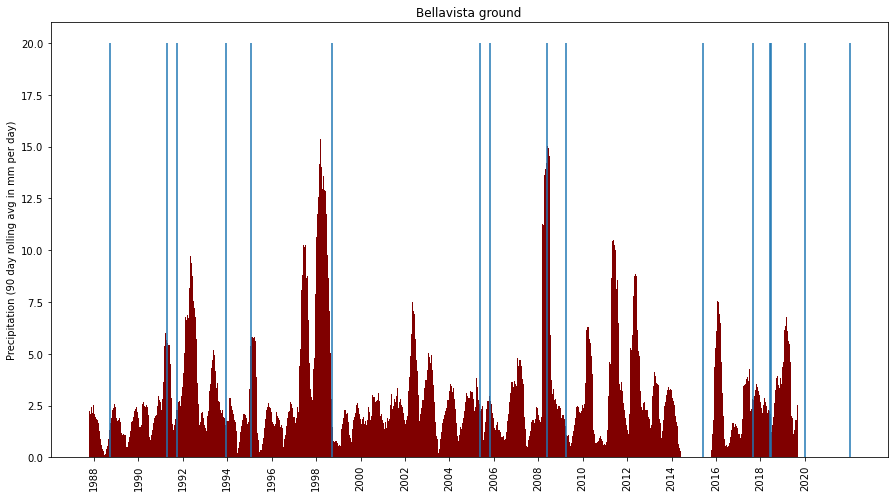

In [78]:
# For Bellavista ground data
all_eruptions = eruptions['Start'][eruptions['Start'] >= '1987-06-01'].apply(date_to_decimal_year)

bellavista['Decimal_Year'] = bellavista['observation_date'].apply(date_to_decimal_year)
# newcent_bellavista = bellavista[(bellavista['Decimal_Year'] > 2000) & (bellavista['Decimal_Year'] < 2001)]

# Produces a plot of 90 day rolling averages or precipitation (in millimeters)
# ground_mean = newcent_bellavista.precipitation.mean()

# For 90 day average
bellavista['roll90'] = bellavista.precipitation.rolling(120).mean()
# ground_precip=np.array(newcent_bellavista['roll90'] - ground_mean)

plt.figure(figsize=(15,8))

plt.bar(bellavista['Decimal_Year'], bellavista['roll90'], color ='maroon',
       width = 0.01)

plt.vlines(all_eruptions, 0, 20)

plt.ylabel("Precipitation (90 day rolling avg in mm per day)")
 
plt.title('Bellavista ground')

plt.xticks(ticks=[1988 + 2*i for i in range(17)], rotation=90)

# Data plot
plt.show()